<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/SimulationVsAnlalytical_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Analytical Solution vs Simulation for RC Circuit</h1></b>

Dr. Bingsen Wang

6/8/2025
</center>

#Python Code

0
0


<ipython-input-40-059e6df2efc8>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  txts[3].set_text(r'$v_{C\_\text{ana}}=%.4f;\ v_{C\_\text{sim}}=%.4f;\ v_{C\_\text{ana}}-v_{C\_\text{sim}}=%.2e\ $'%(vc_ana_t[i],vc_sim_t[i],vc_ana_t[i]-vc_sim_t[i]))


50
100
150
200
250
300
350
0


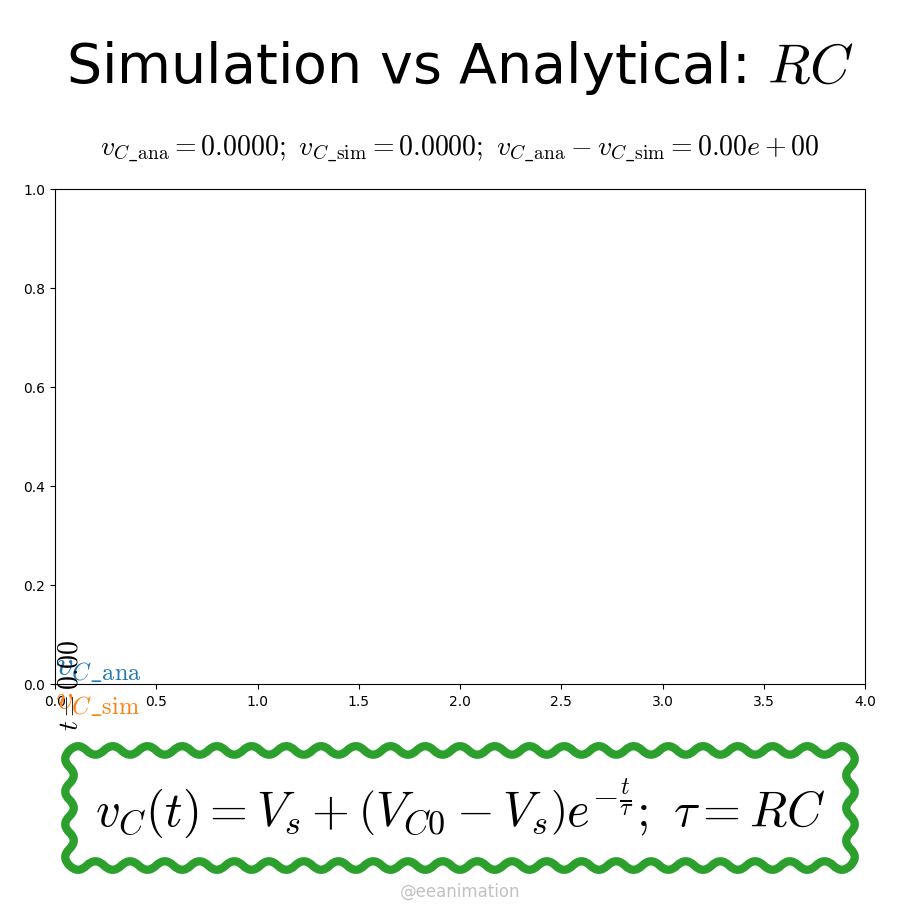

In [40]:
from matplotlib import pyplot,animation,cm
from scipy.integrate import odeint
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def vc_ana(t,tau,vc0,vs):
  return vs+(vc0-vs)*np.exp(-t/tau)

def sys(x,t,vs,tau):
  vc=x;
  dvcdt =  (vs-vc)/tau
  return dvcdt
Nf=400
tau =1; vs=1;vc0=0
t=np.linspace(0,4*tau,Nf)
vc_ana_t=vc_ana(t,tau,vc0,vs)
vc_sim_t=odeint(sys, vc0, t, args=(vs, tau))

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.05,.25,.9,.55],xlim=[0,max(t)],ylim=[0,vs],fc='none');#ax1.axis('off')
ax.text(0,1.05,"Simulation vs Analytical: $RC$",size=40,ha='center')
ax.text(0,-.925,r'$v_C(t)= V_s+\left(V_{C0} - V_s\right)e^{-\frac{t}{\tau}};\ \tau=RC$',
        size=35,ha='center',va='center',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=6))
lines=[ax1.plot([],[],c=cl[k%10],lw=[5,2][k])[0] for k in range(2)]
line_dotted=ax1.plot([],[],'--k',lw=1.2)[0]
txts = [ax1.text(0,0,[r'$v_{C\_\text{ana}}$',r'$v_{C\_\text{sim}}$'][k],size=25,va=['bottom','top'][k],color=cl[k]) for k in range(2)]
txts+= [ax1.text(0,0,'',size=20,rotation=90,va='center')]
txts+= [ax1.text(2,1.05,'',size=20,va='bottom',ha='center')]
def animate(i):
  # i=Nf-1
  if i%50==0: print(i)
  line_dotted.set_data([t[i]]*2,[0,vc_ana_t[i]])
  lines[0].set_data(t[:i+1],vc_ana_t[:i+1])
  lines[1].set_data(t[:i+1],vc_sim_t[:i+1])
  txts[0].set_position([t[i],vc_ana_t[i]])
  txts[1].set_position([t[i],vc_sim_t[i]])
  txts[2].set_position([t[i],vc_ana_t[i]/2])
  txts[2].set_text(r'$t=%.2f$'%(t[i]))
  txts[3].set_text(r'$v_{C\_\text{ana}}=%.4f;\ v_{C\_\text{sim}}=%.4f;\ v_{C\_\text{ana}}-v_{C\_\text{sim}}=%.2e\ $'%(vc_ana_t[i],vc_sim_t[i],vc_ana_t[i]-vc_sim_t[i]))
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("SimulationAnalytical.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)